## Composite loss function RMSE + Cross entropy Loss

Nelson FERNANDEZ PINTO / Perrine Cribier Delande - Renault Research
nelson.fernandez-pinto@renault.com

In [75]:
import numpy as np
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
%matplotlib inline

### Create sample signals

In [31]:
# Create a sinus signal
x = np.linspace(0,20,1000)
targets = np.sin(x)

# Create an average output (model 1)
model1 = np.repeat(np.mean(target), 1000)

# Create shifted sinus (model 2)
model2 = y1 + 4

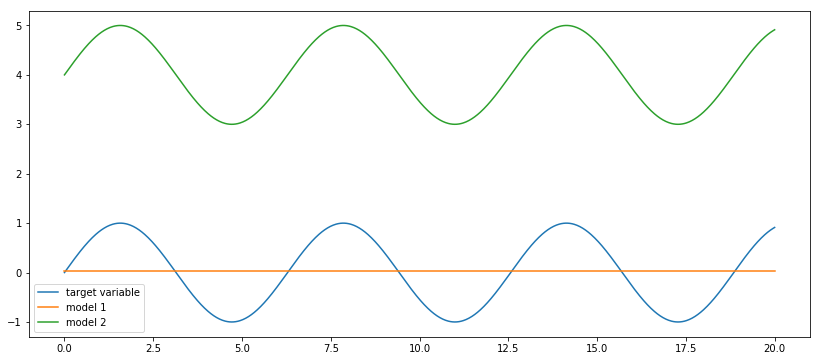

In [83]:
fig, ax = plt.subplots(figsize=(14,6))
plt.plot(x, y1, label= 'target variable')
plt.plot(x, model1, label='model 1')
plt.plot(x, model2, label='model 2')
plt.legend()

In [89]:
# Calculate rmse
def rmse(predictions, targets):
    return np.sqrt(np.mean((predictions-targets)**2))

In [90]:

rmse_loss_model1 = rmse(model1, targets)
rmse_loss_model2 = rmse(model2, targets)


print('RMSE of model 1 = ', rmse_loss_model1)
print('RMSE of model 2 = ', rmse_loss_model2)

RMSE of model 1 =  0.6997943050740331
RMSE of model 2 =  4.0


#### Notes:
   - In this situation you see clearly how the RMSE of model 1 (which don't take into account the shape of the target) is lower than model2 that is indeed more accurate
   
   
### Implementing binary cross entropy (classification)
   We convert the problem to classification by estimating the sign of the derivative on each point of the signal


In [37]:
# We first calculate the derivative of the target and we assing a sign
# Cinematic functions
def derivative(x,y):
    dy = np.zeros(y.shape,np.float)
    dy[0:-1] = np.diff(y)/np.diff(x)
    dy[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])
    return dy

In [77]:
# Calculate the derivative of the target
targets_derivative = derivative(x, targets)

# Calculate the sign of the derivative (+1 if positive, -1 if negative,  0 if 0)
sign_targets_derivative = [np.sign(x) for x in targets_derivative]


# Compute derivative sign of model1
moodel1_derivative = derivative(x, model1)

# Calculate the sign of the derivative (+1 if positive, -1 if negative,  0 if 0)
sign_model1_derivative = [np.sign(x) for x in moodel1_derivative]

# Compute derivative sign of model2
moodel2_derivative = derivative(x, model2)

# Calculate the sign of the derivative (+1 if positive, -1 if negative,  0 if 0)
sign_model2_derivative = [np.sign(x) for x in moodel2_derivative]

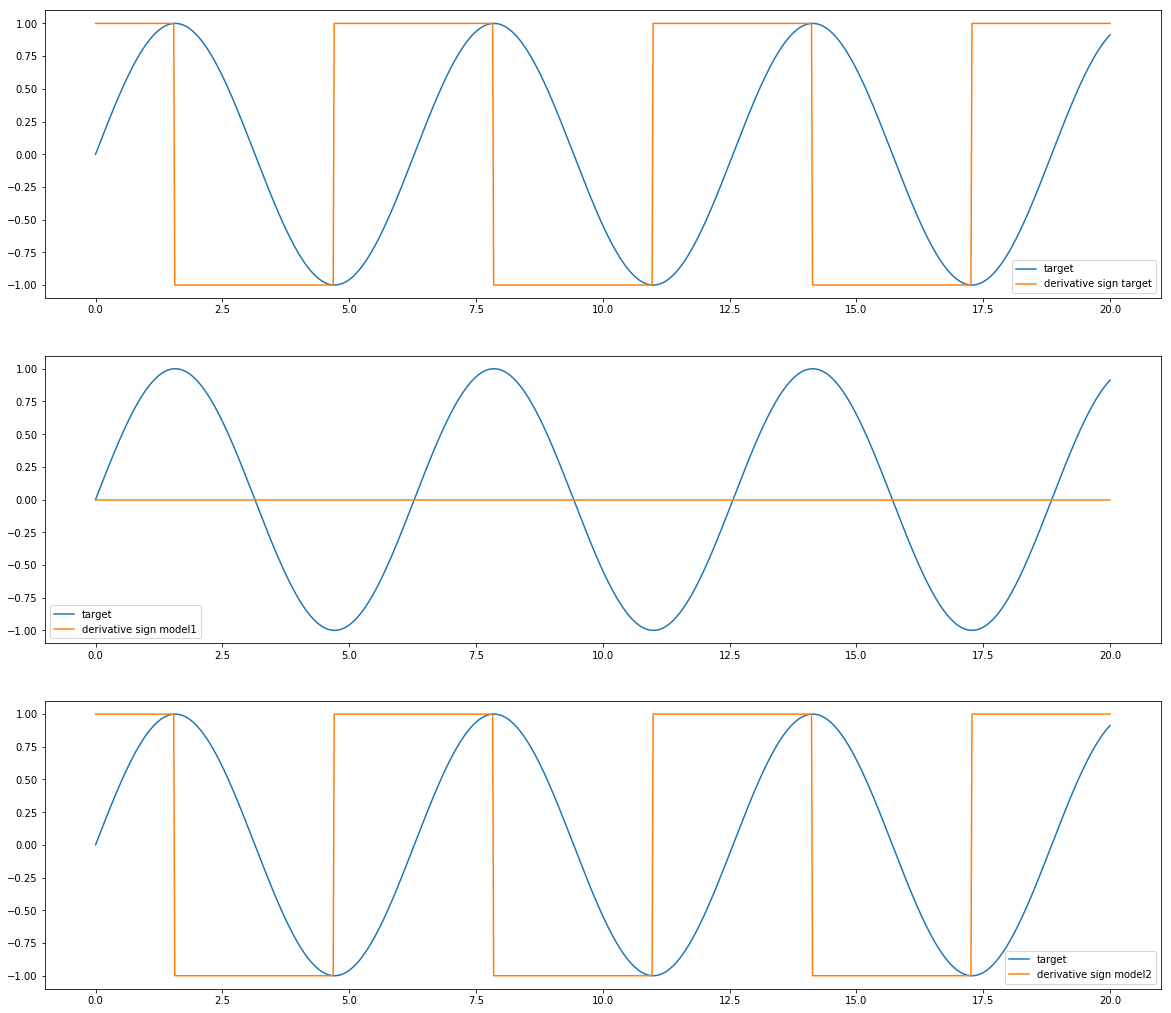

In [85]:
fig, ax = plt.subplots(figsize=(20,18))
plt.title('Derivative sign of target and models')
plt.subplot(3,1,1)
plt.plot(x, targets, label='target')
plt.plot(x, sign_targets_derivative, label='derivative sign target')
plt.legend()

plt.subplot(3,1,2)
plt.plot(x, targets, label='target')
plt.plot(x, sign_model1_derivative, label='derivative sign model1')
plt.legend()

plt.subplot(3,1,3)
plt.plot(x, targets, label='target')
plt.plot(x, sign_model2_derivative, label='derivative sign model2')
plt.legend()


In [87]:
# Compute cross entropy Loss

log_loss_model1 = log_loss(sign_targets_derivative, sign_model1_derivative)
log_loss_model2 = log_loss(sign_targets_derivative, sign_model2_derivative)

print('The log loss Loss between target and model 1 =', log_loss_model1)
print('The log loss Loss between target and model 2 =', log_loss_model2 )

The log loss Loss between target and model 1 = 18.271012712907748
The log loss Loss between target and model 2 = 9.992007221626413e-16


#### Note:
    Here we see how the log loss of the derivative sign, takes into account the SHAPE of the targets and predictions.
    
    
### Combining RMSE and binary cross entropy

    You can create a new loss as a linear combination of RMSE (that takes into account distance) and Binary log loss (that takes into account the shape):
    
                                  total_loss = log_loss(sign(deltax)) + k*RMSE
                                  
                                  
    You can multiply any loss component by a constant to give more relevance to shape or to closeness

In [96]:
def total_loss(log_loss, rmse, k_rmse=0.1):
    '''By default we give 10% of weight to RMSE
    so the shape is more taken into account
    '''
    return log_loss + k_rmse*rmse

In [97]:
total_loss_model1 = total_loss(log_loss_model1, rmse_loss_model1)
total_loss_model2 = total_loss(log_loss_model2, rmse_loss_model2)

print('Total loss of model 1 = ', total_loss_model1)
print('Total loss of model 2 = ', total_loss_model2)

Total loss of model 1 =  18.34099214341515
Total loss of model 2 =  0.400000000000001


### Conclusions

   - Using the total loss the model2 is the most accurate as takes into account the SHAPE of the curve.
   - You should minimize the total loss to find your best model
    